## Team project dataset: Student performance dataset

### Import necessary libraries and load data sets to pandas DataFrame.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [5]:
# Load data for subject "Math".
math = pd.read_csv('student/student-mat.csv', sep=";")
print(math.shape)  # (395, 33)
# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)

(395, 33)


In [6]:
# Load data for subject "Portuguese".
portuguese = pd.read_csv('student/student-por.csv', sep=";")
print(portuguese.shape)  # (649, 33)
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

(649, 33)


In [7]:
# Concatenate both DataFrame vertically
students = pd.concat([math, portuguese])
# Check and make sure the concatenation is correct
assert math.shape[0] + portuguese.shape[0] == students.shape[0], 'merge error'
assert math.shape[1] == portuguese.shape[1] == students.shape[1], 'merge error'

### Check the DataFrame

In [8]:
students.shape

(1044, 34)

In [9]:
students.head() # column 'subject' has been inserted. 

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
students.info() # No data missing, but some columns data type are object (text), data cleansing needed before ML. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null object
subject       1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-nul

In [12]:
# Sort out the all the column names with data type object 
text_columns = []
dataTypeDict = dict(students.dtypes)
for col in dataTypeDict: 
    if dataTypeDict[col] == 'O': 
        text_columns.append(col)
text_columns

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [13]:
# convert all the two-answers categorical features to integers: (Mjob, Fjob, reason, guardian, needs one-hot-encoding method to convert into numerical data)
students['school'] = students['school'].map({'GP':0, "MS":1})
students['subject'] = students['subject'].map({'math':0, "por":1})
students['sex'] = students['sex'].map({'F':0, "M":1})
students['address'] = students['address'].map({'U':0, "R":1})
students['famsize'] = students['famsize'].map({'GT3':0, "LE3":1})
students['Pstatus'] = students['Pstatus'].map({'A':0, "T":1})
students['schoolsup'] = students['schoolsup'].map({'no':0, "yes":1})
students['famsup'] = students['famsup'].map({'no':0, "yes":1})
students['paid'] = students['paid'].map({'no':0, "yes":1})
students['activities'] = students['activities'].map({'no':0, "yes":1})
students['nursery'] = students['nursery'].map({'no':0, "yes":1})
students['higher'] = students['higher'].map({'no':0, "yes":1})
students['internet'] = students['internet'].map({'no':0, "yes":1})
students['romantic'] = students['romantic'].map({'no':0, "yes":1})
# Recheck the dtypes
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null int64
subject       1044 non-null int64
sex           1044 non-null int64
age           1044 non-null int64
address       1044 non-null int64
famsize       1044 non-null int64
Pstatus       1044 non-null int64
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null int64
famsup        1044 non-null int64
paid          1044 non-null int64
activities    1044 non-null int64
nursery       1044 non-null int64
higher        1044 non-null int64
internet      1044 non-null int64
romantic      1044 non-null int64
famrel        1044 non-null int64
freetime      1044 non-null int64
goout 

### Data visualization 

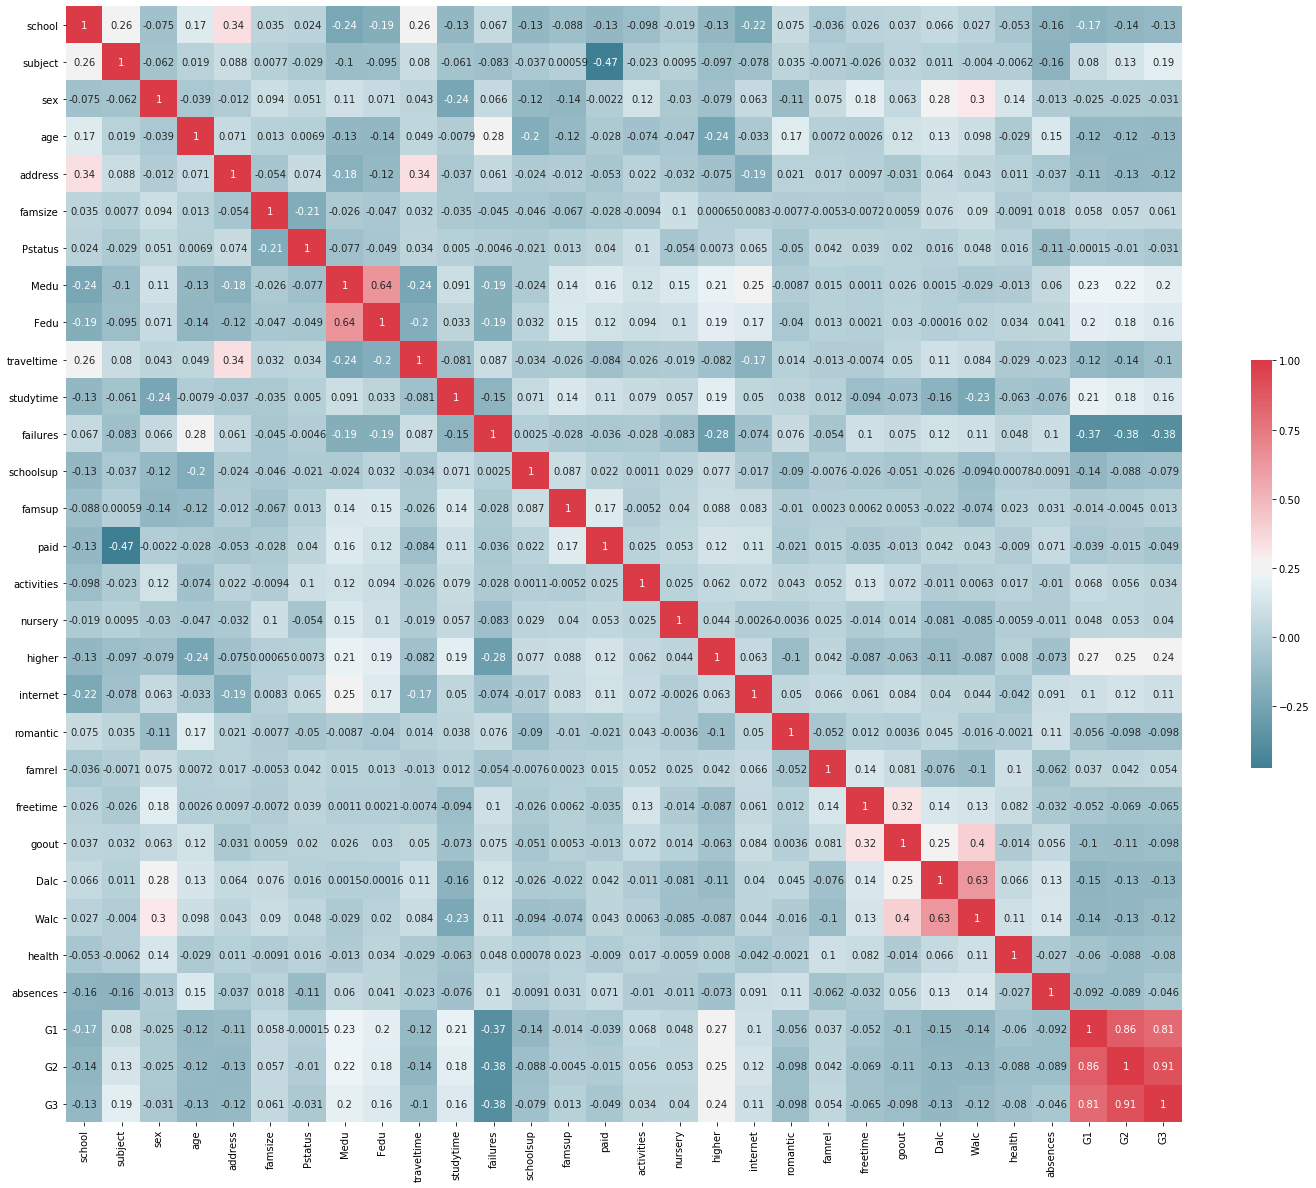

In [14]:
# Plotting the heatmap (missing Mjob, Fjob, reason, guardian)
fig, ax = plt.subplots(figsize=(25, 25))                  

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map
sns.heatmap(data      = students.corr(), 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = True, 
            annot_kws = {'fontsize': 10},
            ax        = ax
           )

### Interesting findings of Heatmap: 
1. G1 and G2 are the most related features to final grade G3. (of course, previous grades demostrate strongly the next grade) 
2. Mother's education is very much related with father's education. (Means people perfer to marry similar education background person, it might because they have more interests in commmon.) 
3. Beside the G1 and G2, we can see the other Top10 influence factors to grade are: failure:-0.38, higher:0.24, Medu:0.2, Fedu:0.16, studytime:0.16, age:-0.13, Dalc:-0.13, address:-0.12, Walc: -0.12, internet:0.11
4. sex, Pstatus, schoolsup, famsup, paid, nursery, romantic, famrel, health, absences (These factors are surpriseingly showing us the grade is not much related to them, which is contrary to our usual perception: family support, school support or extra classes paid should greatly help to improve grades but not as hoped. However, as we usually worried Early school love, poor health and often absences must affect grades but they do not really lead to a decline in grades. 

`So let's visualize these findings by plotting them :)`

Text(0, 0.5, 'Fedu')

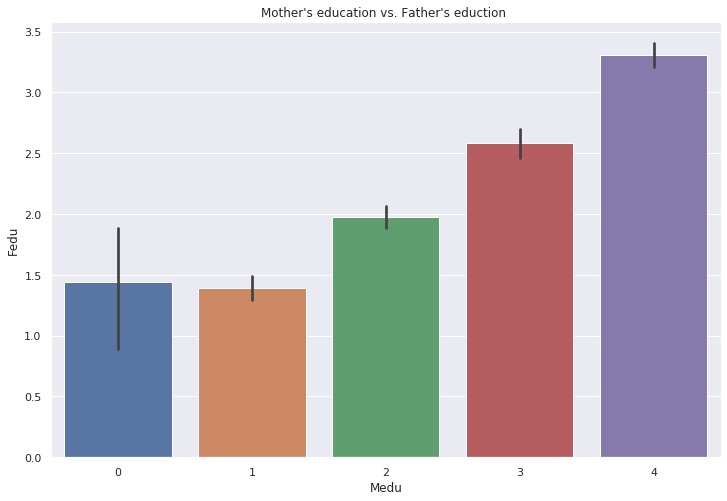

In [24]:
# barplot for Medu and Fedu

plt.figure(figsize=(12, 8))
sns.set()
sns.barplot('Medu', 'Fedu', data=students) 

plt.title("Mother's education vs. Father's eduction ")
plt.xlabel('Medu')
plt.ylabel('Fedu')


In [188]:
# Sort out the all the column names with data type object again
text_columns = []
dataTypeDict = dict(students.dtypes)
for col in dataTypeDict: 
    if dataTypeDict[col] == 'O': 
        text_columns.append(col)
text_columns

['Mjob', 'Fjob', 'reason', 'guardian']

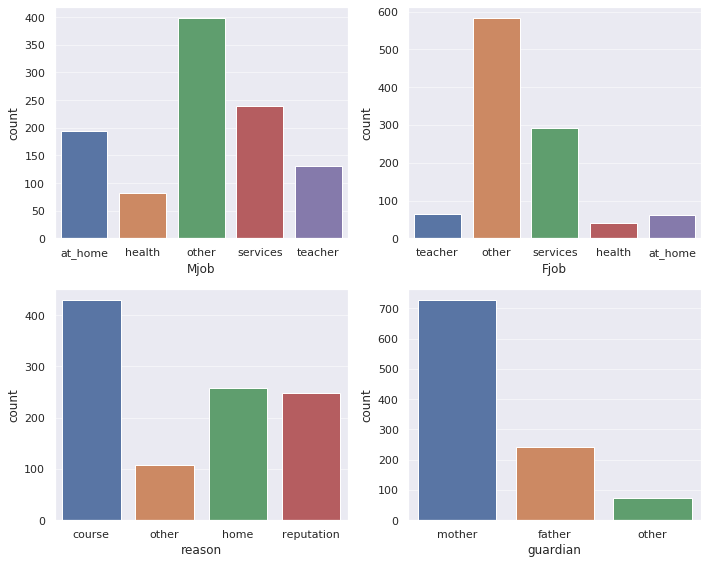

In [192]:
# Plot to understand each text columns

plt.figure(figsize=(10, 8))
i = 0
for col in text_columns: 
    plt.subplot(2, 2, i + 1)
    plt.grid(True, alpha=0.5)
    sns.barplot(students[col], data=students)
#     plt.title(col + ' vs Quality', size=15)
#     plt.xlabel(col, size=12)
#     plt.ylabel('Density')
#     plt.legend()
    plt.tight_layout()
    i += 1



In [185]:
pd.get_dummies(students['Mjob'])

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
644,0,0,0,1,0
645,0,0,0,0,1
646,0,0,1,0,0
647,0,0,0,1,0
